## Lab 11 Tasks

Step 1. 
Load the stock price CSV files for both Apple and Microsoft into separate Pandas DataFrames.

In [5]:
import pandas as pd

apple_data_df = pd.read_csv('stock-apple.csv')
microsoft_data_df = pd.read_csv('stock-microsoft.csv')
print('APPLE Stock Price Data\n', apple_data_df.head(), '\nMICROSOFT Stock Price Data\n', microsoft_data_df.head())

APPLE Stock Price Data
          date   close      volume    open    high     low
0  2017/04/24  143.64  17117710.0  143.50  143.95  143.18
1  2017/04/21  142.27  17290900.0  142.44  142.68  141.85
2  2017/04/20  142.44  23294040.0  141.22  142.92  141.16
3  2017/04/19  140.68  17302160.0  141.88  142.00  140.45
4  2017/04/18  141.20  14676420.0  141.41  142.04  141.11 
MICROSOFT Stock Price Data
          date  close      volume   open   high    low
0  2017/04/24  67.53  29721350.0  67.48  67.66  67.10
1  2017/04/21  66.40  32507090.0  65.67  66.70  65.45
2  2017/04/20  65.50  22298340.0  65.46  65.75  65.14
3  2017/04/19  65.04  26983430.0  65.65  65.75  64.89
4  2017/04/18  65.39  15145300.0  65.33  65.71  65.16


Step 2. For each of the DataFrames, extract only the **close** stock prices for the year 2016. This should give you two new Pandas Series objects.

In [32]:
# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# https://stackoverflow.com/questions/71801877/how-to-filter-column-based-on-another-column-date-range
# https://stackoverflow.com/questions/42196337/dataframe-set-index-not-setting
# https://stackoverflow.com/questions/33246771/convert-pandas-data-frame-to-series
apple_close_stock_prices_2016 = apple_data_df[(apple_data_df['date'] >= '2016/01/01') & (apple_data_df['date'] <= '2016/12/31')][['date', 'close']]
apple_close_stock_prices_2016.set_index('date', inplace=True)
apple_close_stock_prices_2016 = apple_close_stock_prices_2016.iloc[:,0]
print(type(apple_close_stock_prices_2016))
microsoft_close_stock_prices_2016 = microsoft_data_df[(microsoft_data_df['date'] >= '2016/01/01') & (microsoft_data_df['date'] <= '2016/12/31')][['date', 'close']]
microsoft_close_stock_prices_2016.set_index('date', inplace=True)
microsoft_close_stock_prices_2016 = microsoft_close_stock_prices_2016.iloc[:,0]
print(type(microsoft_close_stock_prices_2016))
print('APPLE Close Stock Price Data\n', apple_close_stock_prices_2016.head(), '\nMICROSOFT Close Stock Price Data\n', microsoft_close_stock_prices_2016.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
APPLE Close Stock Price Data
 date
2016/12/30    115.82
2016/12/29    116.73
2016/12/28    116.76
2016/12/27    117.26
2016/12/23    116.52
Name: close, dtype: float64 
MICROSOFT Close Stock Price Data
 date
2016/12/30    62.14
2016/12/29    62.90
2016/12/28    62.99
2016/12/27    63.28
2016/12/23    63.24
Name: close, dtype: float64


Step 3. Create a new time series DataFrame with two columns, one for the Apple 2016 closing prices and one for the Microsoft 2016 closing prices.

In [34]:
# https://stackoverflow.com/questions/45001434/how-to-name-a-pandas-series
apple_close_stock_prices_2016.name = 'APPLE'
microsoft_close_stock_prices_2016.name = 'MICROSOFT'
ts_closingprices_2016 = pd.concat([apple_close_stock_prices_2016, microsoft_close_stock_prices_2016], axis=1)
print(ts_closingprices_2016.head())

             APPLE  MICROSOFT
date                         
2016/12/30  115.82      62.14
2016/12/29  116.73      62.90
2016/12/28  116.76      62.99
2016/12/27  117.26      63.28
2016/12/23  116.52      63.24


Step 4: Plot the 2016 closing prices for Apple and Microsoft, using a 7-day rolling mean.

<AxesSubplot:xlabel='date', ylabel='Closing Stock Price'>

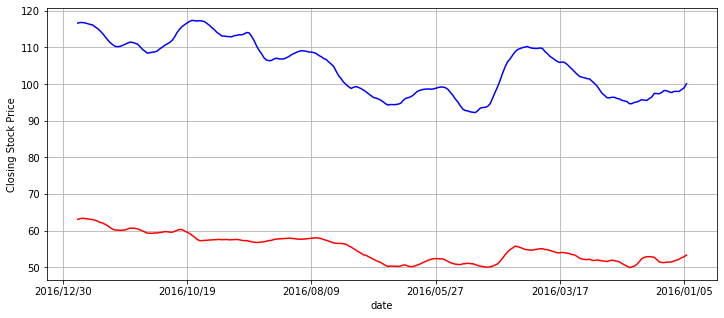

In [39]:
# https://stackoverflow.com/questions/46011940/how-to-plot-two-pandas-time-series-on-same-plot-with-legends-and-secondary-y-axi
import matplotlib.pyplot as plt

applerm = ts_closingprices_2016['APPLE'].rolling(7).mean()
microsoftrm = ts_closingprices_2016['MICROSOFT'].rolling(7).mean()
plt.figure(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
applerm.plot(color='blue', grid=True, label='APPLE')
microsoftrm.plot(color='red', grid=True, label='MICROSOFT')



Step 5. Resample the new DataFrame to monthly time windows, and plot the new monthly time series.

             APPLE  MICROSOFT
date                         
2016-12-30  115.82      62.14
2016-12-29  116.73      62.90
2016-12-28  116.76      62.99
2016-12-27  117.26      63.28
2016-12-23  116.52      63.24
                 APPLE  MICROSOFT
date                             
2016-01-31   98.428947  52.403421
2016-02-29   95.746500  51.380500
2016-03-31  104.267273  53.384091
2016-04-30  106.739048  54.054286
2016-05-31   94.974762  50.969524


<AxesSubplot:xlabel='date', ylabel='Closing Stock Price'>

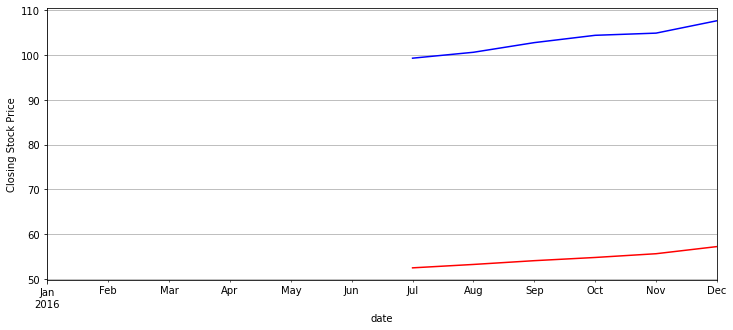

In [44]:
# https://stackoverflow.com/questions/40815238/python-pandas-convert-index-to-datetime
# Convert date index to datetimeindex
ts_closingprices_2016.index = pd.to_datetime(ts_closingprices_2016.index)
print(ts_closingprices_2016.head())
# Resample from daily to monthly frequency
ts_closingprices_2016_monthly = ts_closingprices_2016.resample('M').mean()
print(ts_closingprices_2016_monthly.head())
# Plot the figure
applerm_monthly = ts_closingprices_2016_monthly['APPLE'].rolling(7).mean()
microsoftrm_monthly = ts_closingprices_2016_monthly['MICROSOFT'].rolling(7).mean()
plt.figure(figsize=(12,5))
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
applerm_monthly.plot(color='blue', grid=True, label='APPLE')
microsoftrm_monthly.plot(color='red', grid=True, label='MICROSOFT')